<a href="https://colab.research.google.com/github/Alfredo2738/MLwithPyTorch/blob/main/TRAIN_HS_PD_Lab_15_%5BSOLUTIONS%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 15: Computer Vision**
---


### **Description**
This lab focuses on how we can apply our Deep Learning skills to the field of Computer Vision.


<br>

### **Lab Structure**
* **Part 1**: [MNIST Digit Classifiction](#p1)

* **Part 2**: [Kuzushiji-MNIST Letter Classifiction](#p2)

* **Part 3**: [[OPTIONAL] CIFAR-100 General Image Classifiction](#p3)


<br>

### **Goals**
By the end of this lab, you will:
* Learn how to work with image data.
* Train and evaluate Neural Networks for Computer Vision tasks.

<br>


### **Cheat Sheets**:
* [Deep Learning with keras](https://docs.google.com/document/d/1vc51G6X8ERimrVW6kuyIXNcumR-34-SNiUXA8IYK_1o/edit?usp=sharing)

<br>

**Before starting, run the code below to import all necessary functions and libraries.**




In [ ]:
from keras.models import Sequential
from keras.layers import *

from IPython.display import Image
from keras.datasets import mnist, cifar100
from torchvision.datasets import KMNIST
from keras.optimizers import Adam, SGD
from keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

<a name="p1"></a>

---
## **Part 1: MNIST Digit Classification**
---

In this section, we will build, fit, and evaluate Neural Networks for classifying handwritten digits.

### **Problem #1.1**

To get started, let's:
1. Load and view the data.
2. Scale the features.
3. One hot encode the labels.

#### **1. Load and view the data.**

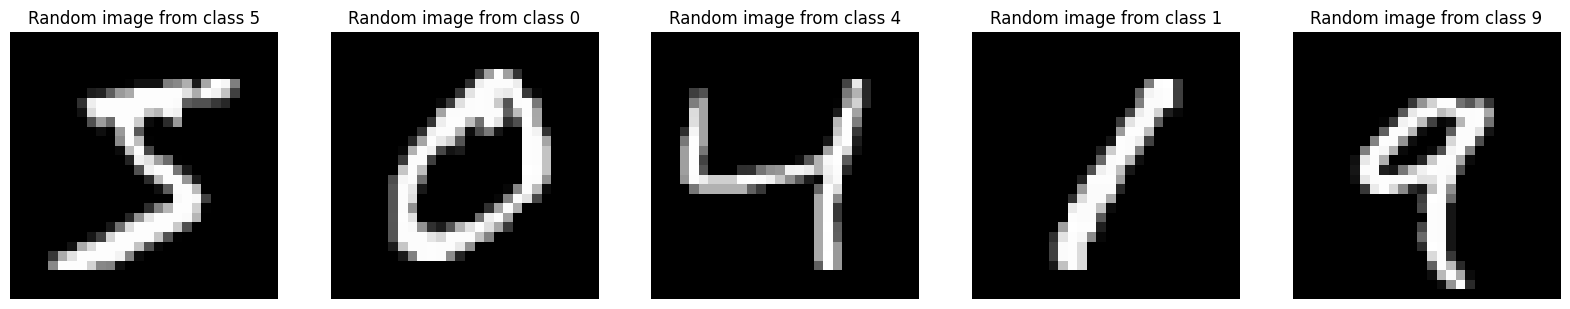

In [ ]:
# import
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Show a few images from the dataset
plt.figure(figsize=(20,5))
for i in range(5):
  plt.subplot(1, 5, i+1)
  plt.title(f"Random image from class {y_train[i]}")
  plt.imshow(X_train[i], cmap='gray')
  plt.axis("off")

plt.show()

#### **2. Scale the features.**

Specifically, we want to just scale the inputs to be between 0 and 1 without impacting the mean or standard deviation. This means that we *don't* want to normalize or standardize. Instead, we need to scale the points from 0 - 255 to 0 - 1.

In [ ]:
X_train = # COMPLETE THIS LINE
X_test = # COMPLETE THIS LINE

##### **Solution**

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

#### **3. One hot encode the labels.**

In [ ]:
y_train = to_categorical(# COMPLETE THIS LINE
y_test = # COMPLETE THIS LINE

##### **Solution**

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


### **Problem #1.2**

Next, let's determine the shape of the data so that we know how to properly setup the input layer of our Neural Network. Specifically, use `X_train.shape` to see what the dimensions of the data is and decide if it needs to be flattened.

<br>

For example, if the `.shape` method returned the tuple:
* `(10,5)`, this would tell us that there are 10 data points each with 5 values. This would not need to be flattened.
* `(10,5,2)`, it would need to be flattened so that instead of each datapoint being a `(5,2)` matrix it is a `(10,1)` flat array.

<br>

**Determine if the data needs to be flattened.**

#### **Solution**


Based on this, the data needs to be flattened.

In [ ]:
X_train.shape

(60000, 28, 28)

### **Problem #1.3**

Now let's build and fit a Neural Network to classify these images. Specifically, let's:
1. Create a Neural Network and fit it to the training data.
2. Print the learned weights and biases.
3. Visualize the training and validation performance per epoch.

#### **1. Create a Neural Network and fit it to the training data.**

Build a NN such that it has:
* The correct number of input neurons (one for each feature). Flattened if need be.
* No hidden layers.
* Ten output neurons with the `'softmax'` activation function. This is the typical output activation function for classification. **NOTE: You need one output neuron per class (digit).**

<br>

Train the NN such that the:
* `loss = 'categorical_crossentropy'`. This is a typical loss function for one hot encoded categorical variables. It compares the probabilities of outputs.
* `metrics = ['accuracy']`.


In [ ]:
model_nn = # COMPLETE THIS LINE
model_nn.add(# COMPLETE THIS LINE
model_nn.add(# COMPLETE THIS LINE

# Compile the model
opt = Adam(learning_rate = 0.1)
model_nn.compile(optimizer = opt, loss = # COMPLETE THIS LINE

# Fit the model on the training data
history = model_nn.fit(X_train, y_train, validation_split = 0.1, epochs=10, batch_size = 16)

##### **Solution**

In [ ]:
model_nn = Sequential()
model_nn.add(Flatten(input_shape = (28, 28)))
model_nn.add(Dense(10, activation='softmax'))

# Compile the model
opt = Adam(learning_rate = 0.1)
model_nn.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fit the model on the training data
history = model_nn.fit(X_train, y_train, verbose = True, validation_split = 0.1, epochs=10, batch_size = 16)

Epoch 1/10
3375/3375 [==============================] - 12s 3ms/step - loss: 2.5787 - accuracy: 0.8527 - val_loss: 2.0700 - val_accuracy: 0.8938
Epoch 2/10
3375/3375 [==============================] - 9s 3ms/step - loss: 2.8035 - accuracy: 0.8768 - val_loss: 2.2047 - val_accuracy: 0.8948
Epoch 3/10
3375/3375 [==============================] - 8s 2ms/step - loss: 2.8078 - accuracy: 0.8819 - val_loss: 2.2430 - val_accuracy: 0.8970
Epoch 4/10
3375/3375 [==============================] - 8s 2ms/step - loss: 2.8013 - accuracy: 0.8834 - val_loss: 2.2410 - val_accuracy: 0.9020
Epoch 5/10
3375/3375 [==============================] - 8s 2ms/step - loss: 2.8317 - accuracy: 0.8859 - val_loss: 2.6847 - val_accuracy: 0.9007
Epoch 6/10
3375/3375 [==============================] - 8s 3ms/step - loss: 2.8326 - accuracy: 0.8883 - val_loss: 2.6013 - val_accuracy: 0.8945
Epoch 7/10
3375/3375 [==============================] - 8s 2ms/step - loss: 2.8229 - accuracy: 0.8880 - val_loss: 2.3880 - val_accuracy

#### **2. Print the learned weights and biases.**

**NOTE**: One of the main strengths of Deep Learning is its ability to learn an enormous number of parameters (weights and biases). This also means that looking at those parameters individually starts lose much meaning.

In [ ]:
layers = model_nn.layers

for i in range(len(layers)):
  print('\nLayer ' + str(i))
  if len(layers[i].get_weights()) > 0:
    print('Weights: \n' + str(layers[i].get_weights()[0]))
    print('\nBiases: \n' + str(layers[i].get_weights()[1]))


Layer 0

Layer 1
Weights: 
[[ 0.07002596  0.05765311 -0.05562002 ... -0.04785929 -0.02970177
   0.07102522]
 [-0.00531873  0.08224235 -0.01633422 ... -0.07458549  0.04370763
   0.06198373]
 [-0.01773141 -0.05011423 -0.07333262 ...  0.02733603 -0.06658299
  -0.07009703]
 ...
 [-0.06550079  0.00493879 -0.04908291 ... -0.0220739  -0.07152838
  -0.03654291]
 [ 0.07808688  0.03373742  0.02748395 ...  0.0721051   0.0039795
   0.00245716]
 [-0.08378696 -0.07757086  0.03674732 ...  0.01422293  0.02899202
  -0.07804897]]

Biases: 
[-22.017086   10.496014    4.9380846  -3.7942588   3.5685391  26.510273
 -10.2529545  16.447987  -20.877262   -4.2099924]


#### **3. Visualize the training and validation performance per epoch.**

Specifically, create two plots:
1. The loss of the NN vs. epochs for both the training and validation sets.

2. The accuracy of the NN vs. epochs for both the training and validation sets. You can do this by replaced `'loss'` with `'accuracy'` anywhere you find it in the code.

In [ ]:
# VISUALIZE
train_loss = history.history[# COMPLETE THIS LINE
plt.plot(train_loss, label = 'Training')

val_loss = history.history[# COMPLETE THIS LINE
plt.plot(val_loss, label = 'Validation')

plt.title('Loss After Each Epoch', fontsize = 'x-large')
plt.xlabel('Epoch', fontsize = 'x-large')
plt.ylabel('Loss', fontsize = 'x-large')
plt.legend()
plt.show()

In [ ]:
# VISUALIZE
train_accuracy = history.history[# COMPLETE THIS LINE
plt.plot(train_accuracy, label = 'Training')

val_accuracy = history.history[# COMPLETE THIS LINE
plt.plot(val_accuracy, label = 'Validation')

plt.title('Accuracy After Each Epoch', fontsize = 'x-large')
plt.xlabel('Epoch', fontsize = 'x-large')
plt.ylabel('Accuracy', fontsize = 'x-large')
plt.legend()
plt.show()

##### **Solution**

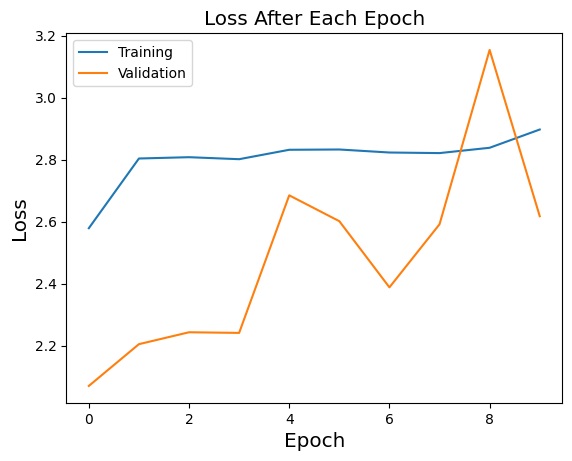

In [ ]:
# VISUALIZE
train_loss = history.history['loss']
plt.plot(train_loss, label = 'Training')

val_loss = history.history['val_loss']
plt.plot(val_loss, label = 'Validation')

plt.title('Loss After Each Epoch', fontsize = 'x-large')
plt.xlabel('Epoch', fontsize = 'x-large')
plt.ylabel('Loss', fontsize = 'x-large')
plt.legend()
plt.show()

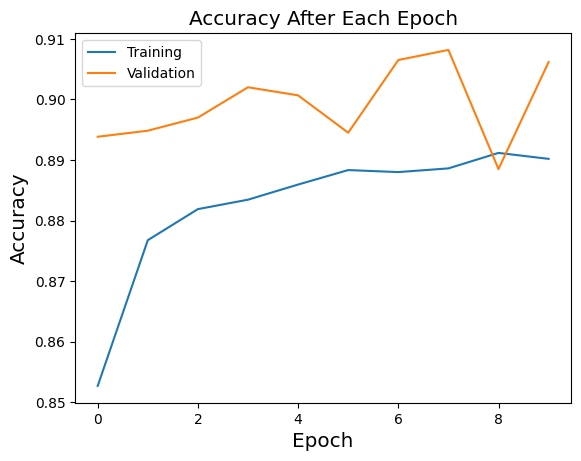

In [ ]:
# VISUALIZE
train_accuracy = history.history['accuracy']
plt.plot(train_accuracy, label = 'Training')

val_accuracy = history.history['val_accuracy']
plt.plot(val_accuracy, label = 'Validation')

plt.title('Accuracy After Each Epoch', fontsize = 'x-large')
plt.xlabel('Epoch', fontsize = 'x-large')
plt.ylabel('Accuracy', fontsize = 'x-large')
plt.legend()
plt.show()

### **Problem #1.4**

Now, improve this model. Consider:
* Adding hidden layers with around the same number of neurons as there are input features (pixels).
* Using non-linear activation functions in any hidden layers.
* Training with a different learning rate.
* Training with more epochs.
* Training with a different batch size.

<br>

Create learning curves to ensure you are creating an improved model.

<br>

**NOTE**: As a benchmark, we were able to train a model that achieved a training accuracy of 99.6% and validation accuracy of 97.9%. See if you can reach or improve upon this, particularly in closing the generalization gap (the difference between the training and validation accuracies).

In [ ]:
# BUILD AND TRAIN

In [ ]:
# VISUALIZE LOSS CURVES

In [ ]:
# VISUALIZE ACCURACY CURVES

#### **Solution**

In [ ]:
model_nn = Sequential()
model_nn.add(Flatten(input_shape = (28, 28)))
model_nn.add(Dense(256, activation = 'relu'))
model_nn.add(Dense(64, activation = 'tanh'))
model_nn.add(Dense(10, activation='softmax'))

# Compile the model
opt = Adam(learning_rate = 0.001)
model_nn.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fit the model on the training data
history = model_nn.fit(X_train, y_train, verbose = True, validation_split = 0.1, epochs=10, batch_size = 32)

Epoch 1/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2119 - accuracy: 0.9371 - val_loss: 0.0875 - val_accuracy: 0.9737
Epoch 2/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0859 - accuracy: 0.9735 - val_loss: 0.0877 - val_accuracy: 0.9742
Epoch 3/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0571 - accuracy: 0.9818 - val_loss: 0.0835 - val_accuracy: 0.9745
Epoch 4/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0430 - accuracy: 0.9860 - val_loss: 0.0772 - val_accuracy: 0.9778
Epoch 5/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0326 - accuracy: 0.9895 - val_loss: 0.0831 - val_accuracy: 0.9788
Epoch 6/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0237 - accuracy: 0.9920 - val_loss: 0.0793 - val_accuracy: 0.9762
Epoch 7/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0204 - accuracy: 0.9933 - val_loss: 0.0761 - val_accuracy:

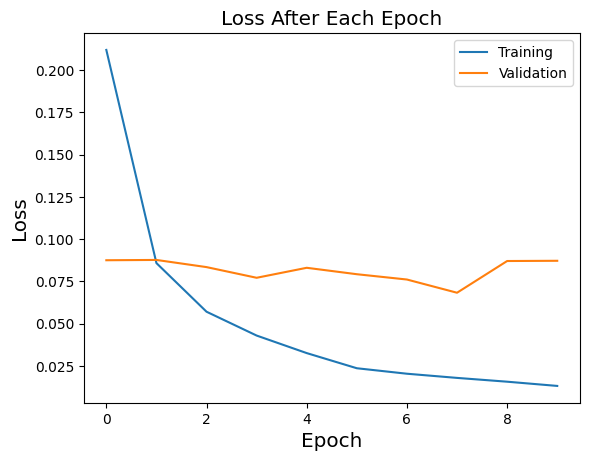

In [ ]:
# VISUALIZE
train_loss = history.history['loss']
plt.plot(train_loss, label = 'Training')

val_loss = history.history['val_loss']
plt.plot(val_loss, label = 'Validation')

plt.title('Loss After Each Epoch', fontsize = 'x-large')
plt.xlabel('Epoch', fontsize = 'x-large')
plt.ylabel('Loss', fontsize = 'x-large')
plt.legend()
plt.show()

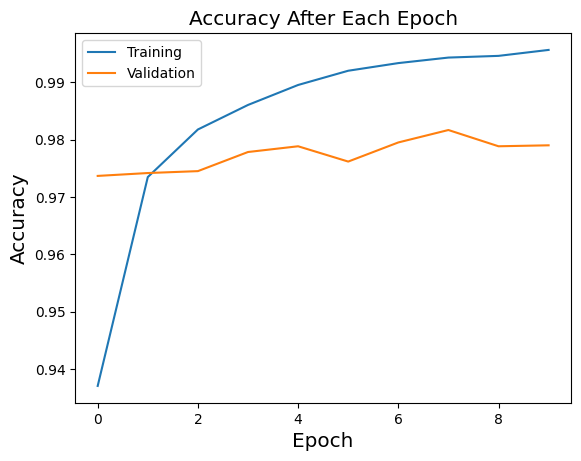

In [ ]:
# VISUALIZE
train_accuracy = history.history['accuracy']
plt.plot(train_accuracy, label = 'Training')

val_accuracy = history.history['val_accuracy']
plt.plot(val_accuracy, label = 'Validation')

plt.title('Accuracy After Each Epoch', fontsize = 'x-large')
plt.xlabel('Epoch', fontsize = 'x-large')
plt.ylabel('Accuracy', fontsize = 'x-large')
plt.legend()
plt.show()

### **Problem #1.5**

**Run the code below to make predictions on the test set using your final model.**

In [ ]:
# Make predictions and convert from probabilities of each digit to single digit
predictions = [np.argmax(d) for d in model_nn.predict(X_test)]


# Plot images with predicted labels
plt.figure(figsize=(20,5))

for i in range(5):
  plt.subplot(1, 5, i+1)
  plt.title(f"Model predicts {predictions[i]}, Actual is {np.argmax(y_test[i])}")
  plt.imshow(X_test[i], cmap='gray')
  plt.axis("off")

plt.show()

<a name="p2"></a>

---
## **Part 2: Kuzushiji-MNIST Letter Classifiction**
---

![Kanji](https://raw.githubusercontent.com/rois-codh/kmnist/master/images/kkanji_examples.png)

<center>

*Image taken from the Kuzushiji-MNIST dataset.*

</center>

<br>

The `K-MNIST` dataset is a newer MNIST-like dataset containing 10 phonetic letters of Hiragana, a Japanese syllabary and component of the Japanese writing system. One intention of the dataset was to link Hiragana from classical literature to modern counterparts (UTF-8 encoded).

Using deep learning, you will develop and evaluate various neural networks to train an AI in image recognition. This project will challenge you to design your own neural networks and evaluate how your choices of hyperparameters impacted your models' accuracies.

<br>

**Your goal is to create a model that classifies the Hirgana letters from the test dataset with 90% accuracy or more.**

### **Problem #2.1**

To get started, let's:
1. Load and view the data.
2. Scale the features.
3. One hot encode the labels.

#### **1. Load and view the data.**

100%|██████████| 18165135/18165135 [00:14<00:00, 1233748.85it/s]


Extracting ./KMNIST/raw/train-images-idx3-ubyte.gz to ./KMNIST/raw



100%|██████████| 29497/29497 [00:00<00:00, 175146.89it/s]


Extracting ./KMNIST/raw/train-labels-idx1-ubyte.gz to ./KMNIST/raw



100%|██████████| 3041136/3041136 [00:03<00:00, 851142.79it/s]


Extracting ./KMNIST/raw/t10k-images-idx3-ubyte.gz to ./KMNIST/raw



100%|██████████| 5120/5120 [00:00<00:00, 25264513.51it/s]
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Extracting ./KMNIST/raw/t10k-labels-idx1-ubyte.gz to ./KMNIST/raw



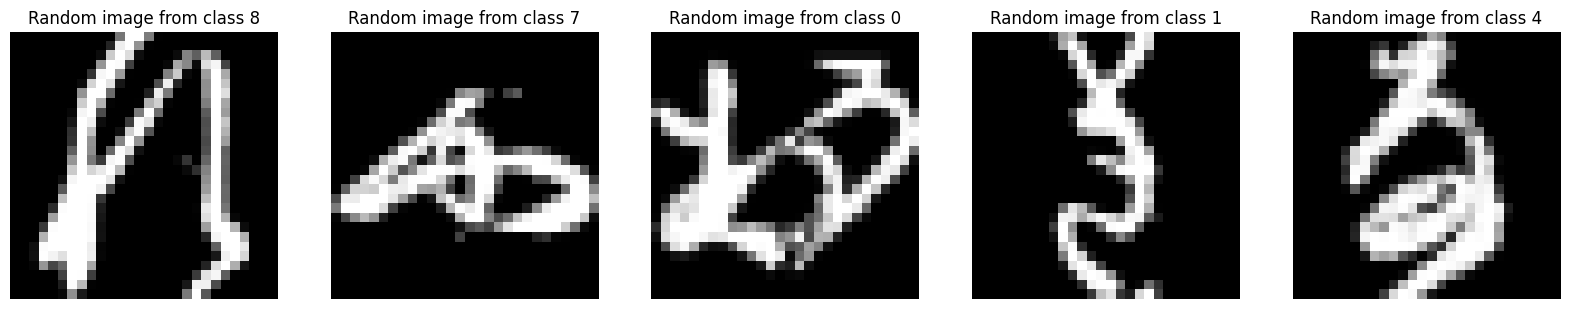

In [ ]:
kmnist_train = KMNIST('.', download='true')
X_train, y_train = kmnist_train.train_data.data.numpy(), kmnist_train.train_labels

kmnist_test = KMNIST('.', download='true', train=False)
X_test, y_test = kmnist_test.test_data.data.numpy(), kmnist_test.test_labels


plt.figure(figsize=(20,5))

# Show a few images from the dataset
for i in range(5):
  plt.subplot(1, 5, i + 1)
  plt.title(f"Random image from class {y_train[i]}")
  plt.imshow(X_train[i], cmap='gray')
  plt.axis("off")

plt.show()

#### **2. Scale the features.**

Specifically, we want to just scale the inputs to be between 0 and 1 without impacting the mean or standard deviation. This means that we *don't* want to normalize or standardize. Instead, we need to scale the points from 0 - 255 to 0 - 1.

In [ ]:
X_train = # COMPLETE THIS LINE
X_test = # COMPLETE THIS LINE

##### **Solution**

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

#### **3. One hot encode the labels.**

In [ ]:
y_train = to_categorical(# COMPLETE THIS LINE
y_test = # COMPLETE THIS LINE

##### **Solution**

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

### **Problem #2.2**

Next, let's determine the shape of the data so that we know how to properly setup the input layer of our Neural Network.

<br>

**IMPORTANT**: While we knew there 10 digits/labels in the Part above, we may not always be familiar with the label enough to know how many unique categories there are. While this is something that is important to verify, we can quickly check how many categories were created for the label by looking at `y_train.shape`.

In [ ]:
# FEATURES SHAPE

In [ ]:
# LABELS SHAPE

#### **Solution**


Based on this, the data needs to be flattened.

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000, 10)

### **Problem #2.3**

Now let's build and fit a Neural Network to classify these images. Specifically, let's:
1. Create a Neural Network and fit it to the training data.
2. Visualize the training and validation performance per epoch.

<br>

**NOTE**: As mentioned in Part 1, viewing the learned weights and biases is *usually* not very meaningful when there are so many of them. As such, you are not required to do that here.

#### **1. Create a Neural Network and fit it to the training data.**

Build a NN such that it has:
* The correct number of input neurons (one for each feature). Flattened if need be.
* No hidden layers.
* Ten output neurons with the `'softmax'` activation function. This is the typical output activation function for classification. **NOTE: You need one output neuron per class (letter).**

<br>

Train the NN such that the:
* `loss = 'categorical_crossentropy'`. This is a typical loss function for one hot encoded categorical variables. It compares the probabilities of outputs.
* `metrics = ['accuracy']`.


In [ ]:
model_nn = # COMPLETE THIS LINE
model_nn.add(# COMPLETE THIS LINE
model_nn.add(# COMPLETE THIS LINE

# Compile the model
opt = Adam(learning_rate = 0.1)
model_nn.compile(# COMPLETE THIS LINE

# Fit the model on the training data
history = model_nn.fit(X_train, y_train, validation_split = 0.1, epochs=10, batch_size = 16)

##### **Solution**

In [ ]:
model_nn = Sequential()
model_nn.add(Flatten(input_shape = (28, 28)))
model_nn.add(Dense(10, activation='softmax'))

# Compile the model
opt = Adam(learning_rate = 0.1)
model_nn.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fit the model on the training data
history = model_nn.fit(X_train, y_train, verbose = True, validation_split = 0.1, epochs=10, batch_size = 16)

Epoch 1/10
3375/3375 [==============================] - 7s 2ms/step - loss: 6.5022 - accuracy: 0.7202 - val_loss: 7.5900 - val_accuracy: 0.7187
Epoch 2/10
3375/3375 [==============================] - 7s 2ms/step - loss: 7.0512 - accuracy: 0.7421 - val_loss: 7.0894 - val_accuracy: 0.7513
Epoch 3/10
3375/3375 [==============================] - 6s 2ms/step - loss: 7.1833 - accuracy: 0.7462 - val_loss: 7.9523 - val_accuracy: 0.7287
Epoch 4/10
3375/3375 [==============================] - 8s 2ms/step - loss: 7.1773 - accuracy: 0.7508 - val_loss: 8.2037 - val_accuracy: 0.7338
Epoch 5/10
3375/3375 [==============================] - 7s 2ms/step - loss: 7.0584 - accuracy: 0.7526 - val_loss: 8.0422 - val_accuracy: 0.7433
Epoch 6/10
3375/3375 [==============================] - 11s 3ms/step - loss: 7.1447 - accuracy: 0.7513 - val_loss: 7.5852 - val_accuracy: 0.7520
Epoch 7/10
3375/3375 [==============================] - 8s 2ms/step - loss: 7.1163 - accuracy: 0.7541 - val_loss: 7.6424 - val_accuracy

#### **2. Visualize the training and validation performance per epoch.**

Specifically, create two plots:
1. The loss of the NN vs. epochs for both the training and validation sets.

2. The accuracy of the NN vs. epochs for both the training and validation sets. You can do this by replaced `'loss'` with `'accuracy'` anywhere you find it in the code.

##### **Solution**

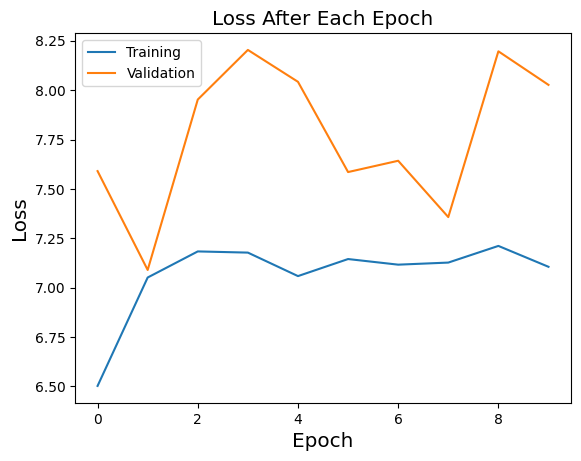

In [ ]:
# VISUALIZE
train_loss = history.history['loss']
plt.plot(train_loss, label = 'Training')

val_loss = history.history['val_loss']
plt.plot(val_loss, label = 'Validation')

plt.title('Loss After Each Epoch', fontsize = 'x-large')
plt.xlabel('Epoch', fontsize = 'x-large')
plt.ylabel('Loss', fontsize = 'x-large')
plt.legend()
plt.show()

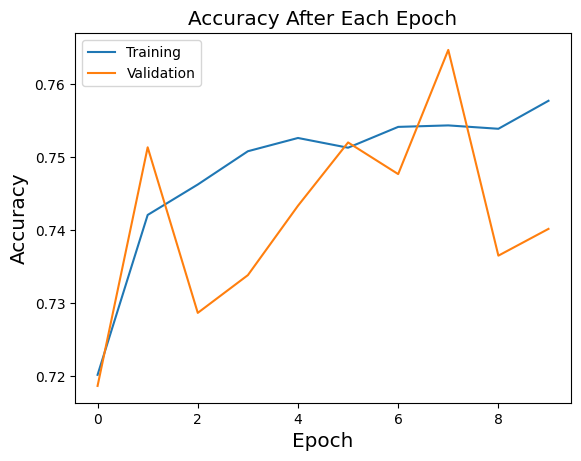

In [ ]:
# VISUALIZE
train_accuracy = history.history['accuracy']
plt.plot(train_accuracy, label = 'Training')

val_accuracy = history.history['val_accuracy']
plt.plot(val_accuracy, label = 'Validation')

plt.title('Accuracy After Each Epoch', fontsize = 'x-large')
plt.xlabel('Epoch', fontsize = 'x-large')
plt.ylabel('Accuracy', fontsize = 'x-large')
plt.legend()
plt.show()

### **Problem #2.4**

Now, improve this model such that it achieves at least a 90% accuracy on both the training and validation sets. Consider:
* Adding hidden layers with around the same number of neurons as there are input features (pixels).
* Using non-linear activation functions in any hidden layers.
* Training with a different learning rate.
* Training with more epochs.
* Training with a different batch size.

<br>

Create learning curves to ensure you are creating an improved model.

<br>

**NOTE**: As a benchmark, we were able to train a model that achieved a training accuracy of 99.3% and validation accuracy of 96.5%. See if you can reach or improve upon this, particularly in closing the generalization gap (the difference between the training and validation accuracies).

In [ ]:
# BUILD AND TRAIN

In [ ]:
# VISUALIZE LOSS CURVES

In [ ]:
# VISUALIZE ACCURACY CURVES

#### **Solution**

In [ ]:
model_nn = Sequential()
model_nn.add(Flatten(input_shape = (28, 28)))
model_nn.add(Dense(512, activation='relu'))
model_nn.add(Dense(256, activation='relu'))
model_nn.add(Dense(10, activation='softmax'))

# Compile the model
opt = Adam(learning_rate = 0.001)
model_nn.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fit the model on the training data
history = model_nn.fit(X_train, y_train, verbose = True, validation_split = 0.1, epochs=10, batch_size = 32)

Epoch 1/10
1688/1688 [==============================] - 12s 7ms/step - loss: 0.3075 - accuracy: 0.9063 - val_loss: 0.1909 - val_accuracy: 0.9417
Epoch 2/10
1688/1688 [==============================] - 12s 7ms/step - loss: 0.1275 - accuracy: 0.9603 - val_loss: 0.1492 - val_accuracy: 0.9577
Epoch 3/10
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0811 - accuracy: 0.9744 - val_loss: 0.1458 - val_accuracy: 0.9585
Epoch 4/10
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0547 - accuracy: 0.9828 - val_loss: 0.1535 - val_accuracy: 0.9593
Epoch 5/10
1688/1688 [==============================] - 11s 7ms/step - loss: 0.0419 - accuracy: 0.9862 - val_loss: 0.1765 - val_accuracy: 0.9592
Epoch 6/10
1688/1688 [==============================] - 11s 7ms/step - loss: 0.0337 - accuracy: 0.9885 - val_loss: 0.1954 - val_accuracy: 0.9585
Epoch 7/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0329 - accuracy: 0.9894 - val_loss: 0.1829 - val_ac

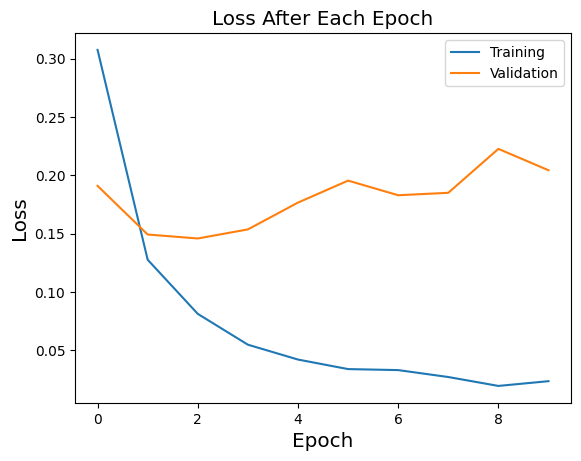

In [ ]:
# VISUALIZE
train_loss = history.history['loss']
plt.plot(train_loss, label = 'Training')

val_loss = history.history['val_loss']
plt.plot(val_loss, label = 'Validation')

plt.title('Loss After Each Epoch', fontsize = 'x-large')
plt.xlabel('Epoch', fontsize = 'x-large')
plt.ylabel('Loss', fontsize = 'x-large')
plt.legend()
plt.show()

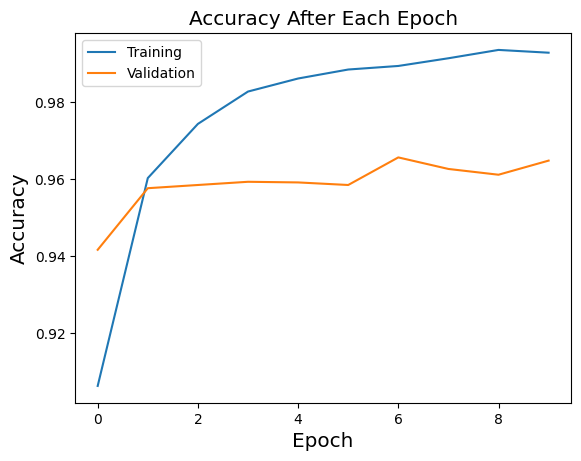

In [ ]:
# VISUALIZE
train_accuracy = history.history['accuracy']
plt.plot(train_accuracy, label = 'Training')

val_accuracy = history.history['val_accuracy']
plt.plot(val_accuracy, label = 'Validation')

plt.title('Accuracy After Each Epoch', fontsize = 'x-large')
plt.xlabel('Epoch', fontsize = 'x-large')
plt.ylabel('Accuracy', fontsize = 'x-large')
plt.legend()
plt.show()

### **Problem #2.5**

**Run the code below to make predictions on the test set using your final model.**

313/313 [==============================] - 1s 3ms/step


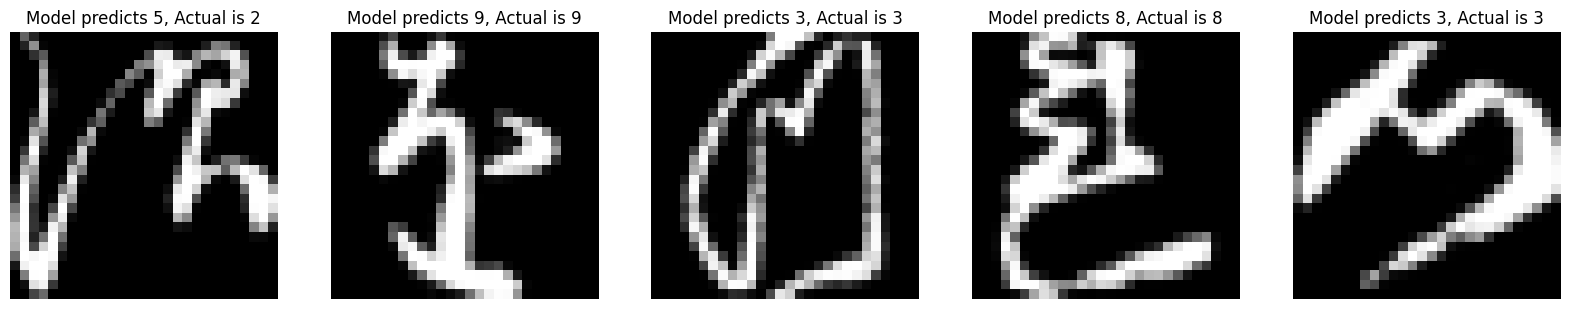

In [ ]:
# Make predictions and convert from probabilities of each digit to single digit
predictions = [np.argmax(d) for d in model_nn.predict(X_test)]


# Plot images with predicted labes
plt.figure(figsize=(20,5))

for i in range(5):
  plt.subplot(1, 5, i+1)
  plt.title(f"Model predicts {predictions[i]}, Actual is {np.argmax(y_test[i])}")
  plt.imshow(X_test[i], cmap='gray')
  plt.axis("off")

plt.show()

<a name="p3"></a>

---
## **Part 3: [OPTIONAL] CIFAR-100 Classifiction**
---

In the independent work section of the lab you will make a neural network that classifies images from the CIFAR-100 dataset. This dataset contains 60,000 images each of 32x32 RGB color images that belong to 1 out of 100 possible classes:

1-5) beaver, dolphin, otter, seal, whale

6-10) aquarium fish, flatfish, ray, shark, trout

11-15) orchids, poppies, roses, sunflowers, tulips

16-20) bottles, bowls, cans, cups, plates

21-25) apples, mushrooms, oranges, pears, sweet peppers

26-30) clock, computer keyboard, lamp, telephone, television

31-35) bed, chair, couch, table, wardrobe

36-40) bee, beetle, butterfly, caterpillar, cockroach

41-45) bear, leopard, lion, tiger, wolf

46-50) bridge, castle, house, road, skyscraper

51-55) cloud, forest, mountain, plain, sea

56-60) camel, cattle, chimpanzee, elephant, kangaroo

61-65) fox, porcupine, possum, raccoon, skunk

66-70) crab, lobster, snail, spider, worm

71-75) baby, boy, girl, man, woman

76-80) crocodile, dinosaur, lizard, snake, turtle

81-85) hamster, mouse, rabbit, shrew, squirrel

86-90) maple, oak, palm, pine, willow

91-95) bicycle, bus, motorcycle, pickup truck, train

96-100) lawn-mower, rocket, streetcar, tank, tractor

<br>

and the list of the 20 superclasses:

1) aquatic mammals (classes 1-5)

2) fish (classes 6-10)

3) flowers (classes 11-15)

4) food containers (classes 16-20)

5) fruit and vegetables (classes 21-25)

6) household electrical devices (classes 26-30)

7) household furniture (classes 31-35)

8) insects (classes 36-40)

9) large carnivores (classes 41-45)

10) large man-made outdoor things (classes 46-50)

11) large natural outdoor scenes (classes 51-55)

12) large omnivores and herbivores (classes 56-60)

13) medium-sized mammals (classes 61-65)

14) non-insect invertebrates (classes 66-70)

15) people (classes 71-75)

16) reptiles (classes 76-80)

17) small mammals (classes 81-85)

18) trees (classes 86-90)

19) vehicles 1 (classes 91-95)

20) vehicles 2 (classes 96-100)


### **Problem #3.1**

To get started, let's:
1. Load and view the data.
2. Scale the features.
3. One hot encode the labels.

#### **1. Load and view the data.**

169001437/169001437 [==============================] - 6s 0us/step


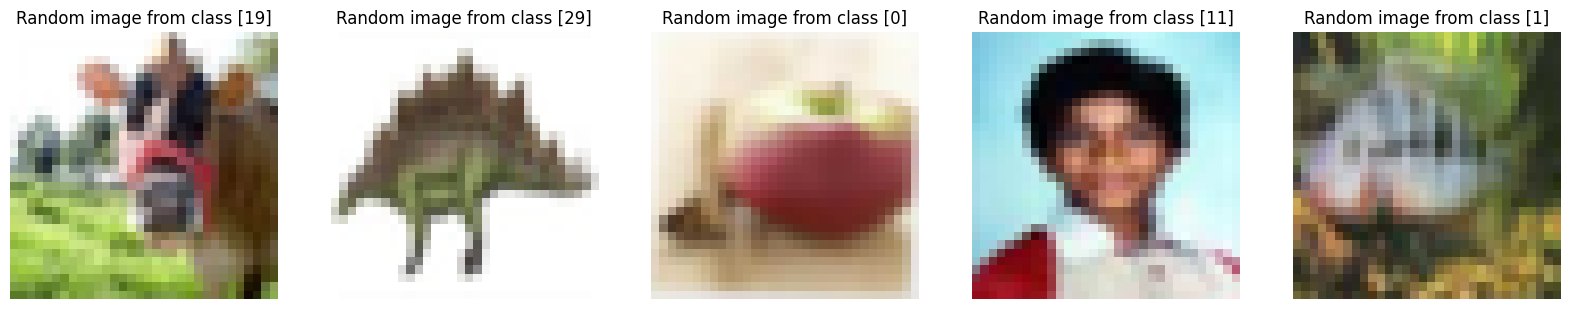

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar100.load_data()


plt.figure(figsize=(20,5))

# Show a few images from the dataset
for i in range(5):
  plt.subplot(1, 5, i + 1)
  plt.title(f"Random image from class {y_train[i]}")
  plt.imshow(X_train[i], cmap='gray')
  plt.axis("off")

plt.show()

#### **2. Scale the features.**

Specifically, we want to just scale the inputs to be between 0 and 1 without impacting the mean or standard deviation. This means that we *don't* want to normalize or standardize. Instead, we need to scale the points from 0 - 255 to 0 - 1.

In [ ]:
X_train = # COMPLETE THIS LINE
X_test = # COMPLETE THIS LINE

##### **Solution**

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

#### **3. One hot encode the labels.**

In [ ]:
y_train = to_categorical(# COMPLETE THIS LINE
y_test = # COMPLETE THIS LINE

##### **Solution**

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

### **Problem #3.2**

Next, let's determine the shape of the data so that we know how to properly setup the input layer of our Neural Network.

<br>

**IMPORTANT**: While we knew there 10 digits/labels in the Part above, we may not always be familiar with the label enough to know how many unique categories there are. While this is something that is important to verify, we can quickly check how many categories were created for the label by looking at `y_train.shape`.

In [ ]:
# FEATURES SHAPE

In [ ]:
# LABELS SHAPE

#### **Solution**


Based on this, the data needs to be flattened.

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 100)

### **Problem #3.3**

Now let's build and fit a Neural Network to classify these images. Specifically, let's:
1. Create a Neural Network and fit it to the training data.
2. Visualize the training and validation performance per epoch.

<br>

**NOTE**: As mentioned in Part 1, viewing the learned weights and biases is *usually* not very meaningful when there are so many of them. As such, you are not required to do that here.

#### **1. Create a Neural Network and fit it to the training data.**

Build a NN such that it has:
* The correct number of input neurons (one for each feature). Flattened if need be.
* No hidden layers.
* Ten output neurons with the `'softmax'` activation function. This is the typical output activation function for classification. **NOTE: You need one output neuron per class (letter).**

<br>

Train the NN such that the:
* `loss = 'categorical_crossentropy'`. This is a typical loss function for one hot encoded categorical variables. It compares the probabilities of outputs.
* `metrics = ['accuracy']`.


In [ ]:
model_nn = # COMPLETE THIS LINE
model_nn.add(# COMPLETE THIS LINE
model_nn.add(# COMPLETE THIS LINE

# Compile the model
opt = Adam(learning_rate = 0.1)
model_nn.compile(# COMPLETE THIS LINE

# Fit the model on the training data
history = model_nn.fit(X_train, y_train, validation_split = 0.1, epochs=10, batch_size = 16)

##### **Solution**

In [ ]:
model_nn = Sequential()
model_nn.add(Flatten(input_shape = (32, 32, 3)))
model_nn.add(Dense(100, activation='softmax'))

# Compile the model
opt = Adam(learning_rate = 0.1)
model_nn.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fit the model on the training data
history = model_nn.fit(X_train, y_train, verbose = True, validation_split = 0.1, epochs=10, batch_size = 16)

Epoch 1/10
2813/2813 [==============================] - 14s 5ms/step - loss: 231.6422 - accuracy: 0.0544 - val_loss: 250.8474 - val_accuracy: 0.0648
Epoch 2/10
2813/2813 [==============================] - 14s 5ms/step - loss: 222.2822 - accuracy: 0.0751 - val_loss: 278.2180 - val_accuracy: 0.0578
Epoch 3/10
2813/2813 [==============================] - 13s 4ms/step - loss: 220.7395 - accuracy: 0.0858 - val_loss: 270.9716 - val_accuracy: 0.0502
Epoch 4/10
2813/2813 [==============================] - 13s 4ms/step - loss: 221.8223 - accuracy: 0.0888 - val_loss: 237.6862 - val_accuracy: 0.0614
Epoch 5/10
2813/2813 [==============================] - 15s 5ms/step - loss: 220.5003 - accuracy: 0.0939 - val_loss: 266.0529 - val_accuracy: 0.0678
Epoch 6/10
2813/2813 [==============================] - 14s 5ms/step - loss: 216.0697 - accuracy: 0.1022 - val_loss: 234.5426 - val_accuracy: 0.0778
Epoch 7/10
2813/2813 [==============================] - 12s 4ms/step - loss: 222.7262 - accuracy: 0.1033 -

#### **2. Visualize the training and validation performance per epoch.**

Specifically, create two plots:
1. The loss of the NN vs. epochs for both the training and validation sets.

2. The accuracy of the NN vs. epochs for both the training and validation sets. You can do this by replaced `'loss'` with `'accuracy'` anywhere you find it in the code.

##### **Solution**

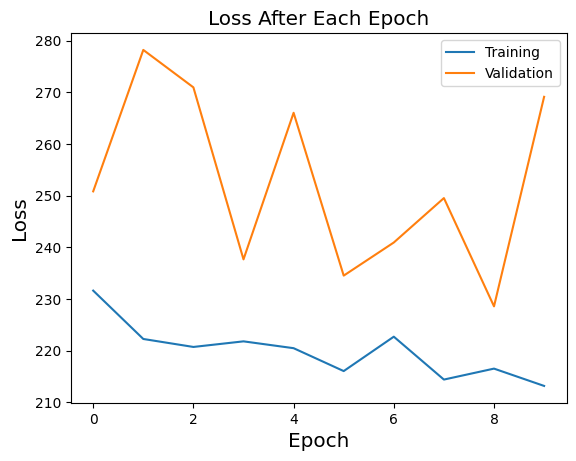

In [ ]:
# VISUALIZE
train_loss = history.history['loss']
plt.plot(train_loss, label = 'Training')

val_loss = history.history['val_loss']
plt.plot(val_loss, label = 'Validation')

plt.title('Loss After Each Epoch', fontsize = 'x-large')
plt.xlabel('Epoch', fontsize = 'x-large')
plt.ylabel('Loss', fontsize = 'x-large')
plt.legend()
plt.show()

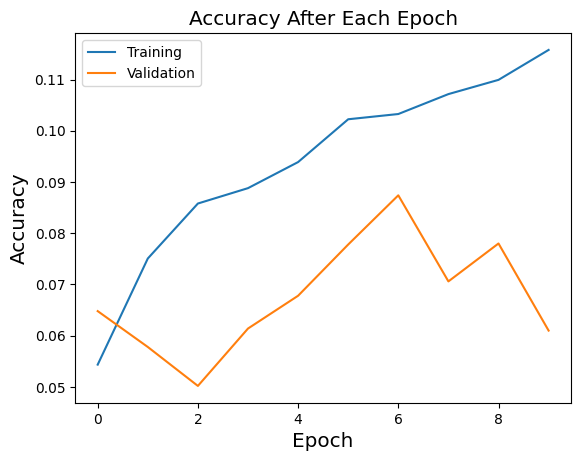

In [ ]:
# VISUALIZE
train_accuracy = history.history['accuracy']
plt.plot(train_accuracy, label = 'Training')

val_accuracy = history.history['val_accuracy']
plt.plot(val_accuracy, label = 'Validation')

plt.title('Accuracy After Each Epoch', fontsize = 'x-large')
plt.xlabel('Epoch', fontsize = 'x-large')
plt.ylabel('Accuracy', fontsize = 'x-large')
plt.legend()
plt.show()

### **Problem #3.4**

Now, improve this model. Consider:
* Adding hidden layers with around the same number of neurons as there are input features (pixels).
* Using non-linear activation functions in any hidden layers.
* Training with a different learning rate.
* Training with more epochs.
* Training with a different batch size.

<br>

Create learning curves to ensure you are creating an improved model.

In [ ]:
# BUILD AND TRAIN

In [ ]:
# VISUALIZE LOSS CURVES

In [ ]:
# VISUALIZE ACCURACY CURVES

#### **Solution**

In [ ]:
model_nn = Sequential()
model_nn.add(Flatten(input_shape = (32, 32, 3)))
model_nn.add(Dense(512, activation='relu'))
model_nn.add(Dense(256, activation='relu'))
model_nn.add(Dense(256, activation='relu'))
model_nn.add(Dense(100, activation='softmax'))

# Compile the model
opt = Adam(learning_rate = 0.0001)
model_nn.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fit the model on the training data
history = model_nn.fit(X_train, y_train, verbose = True, validation_split = 0.1, epochs=100, batch_size = 64)

Epoch 1/100
704/704 [==============================] - 4s 5ms/step - loss: 4.2165 - accuracy: 0.0651 - val_loss: 3.9904 - val_accuracy: 0.1078
Epoch 2/100
704/704 [==============================] - 3s 4ms/step - loss: 3.8391 - accuracy: 0.1192 - val_loss: 3.7927 - val_accuracy: 0.1292
Epoch 3/100
704/704 [==============================] - 3s 4ms/step - loss: 3.6732 - accuracy: 0.1461 - val_loss: 3.6770 - val_accuracy: 0.1386
Epoch 4/100
704/704 [==============================] - 3s 4ms/step - loss: 3.5649 - accuracy: 0.1642 - val_loss: 3.5856 - val_accuracy: 0.1674
Epoch 5/100
704/704 [==============================] - 3s 4ms/step - loss: 3.4800 - accuracy: 0.1820 - val_loss: 3.5405 - val_accuracy: 0.1700
Epoch 6/100
704/704 [==============================] - 3s 5ms/step - loss: 3.4078 - accuracy: 0.1943 - val_loss: 3.4862 - val_accuracy: 0.1824
Epoch 7/100
704/704 [==============================] - 3s 5ms/step - loss: 3.3404 - accuracy: 0.2075 - val_loss: 3.4320 - val_accuracy: 0.1904

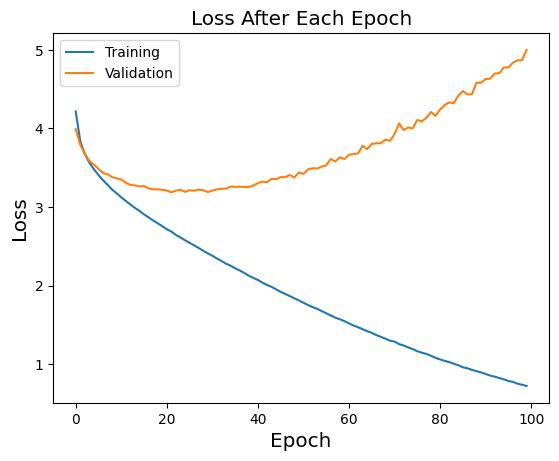

In [ ]:
# VISUALIZE
train_loss = history.history['loss']
plt.plot(train_loss, label = 'Training')

val_loss = history.history['val_loss']
plt.plot(val_loss, label = 'Validation')

plt.title('Loss After Each Epoch', fontsize = 'x-large')
plt.xlabel('Epoch', fontsize = 'x-large')
plt.ylabel('Loss', fontsize = 'x-large')
plt.legend()
plt.show()

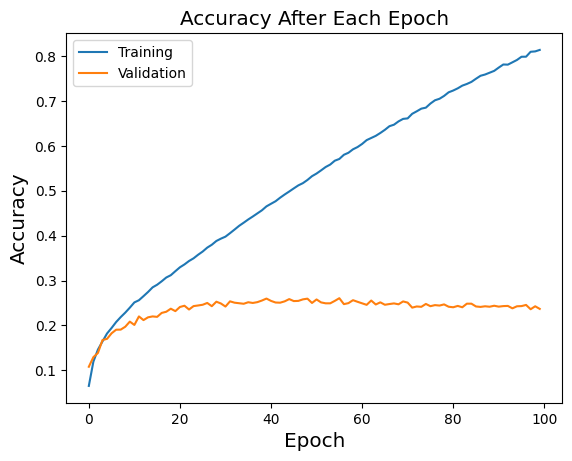

In [ ]:
# VISUALIZE
train_accuracy = history.history['accuracy']
plt.plot(train_accuracy, label = 'Training')

val_accuracy = history.history['val_accuracy']
plt.plot(val_accuracy, label = 'Validation')

plt.title('Accuracy After Each Epoch', fontsize = 'x-large')
plt.xlabel('Epoch', fontsize = 'x-large')
plt.ylabel('Accuracy', fontsize = 'x-large')
plt.legend()
plt.show()

### **Problem #3.5**

Complete the code below to make predictions on the test set using your final model.

In [ ]:
# Make predictions and convert from probabilities of each digit to single digit
predictions = [np.argmax(# COMPLETE THIS LINE


# Plot images with predicted labels
plt.figure(figsize=(20,5))

for i in range(5):
  plt.subplot(1, 5, i+1)
  plt.title(f"Model predicts {predictions[i]}, Actual is {np.argmax(y_test[i])}")
  plt.imshow(X_test[i], cmap='gray')
  plt.axis("off")

plt.show()

#### **Solution**

313/313 [==============================] - 1s 2ms/step


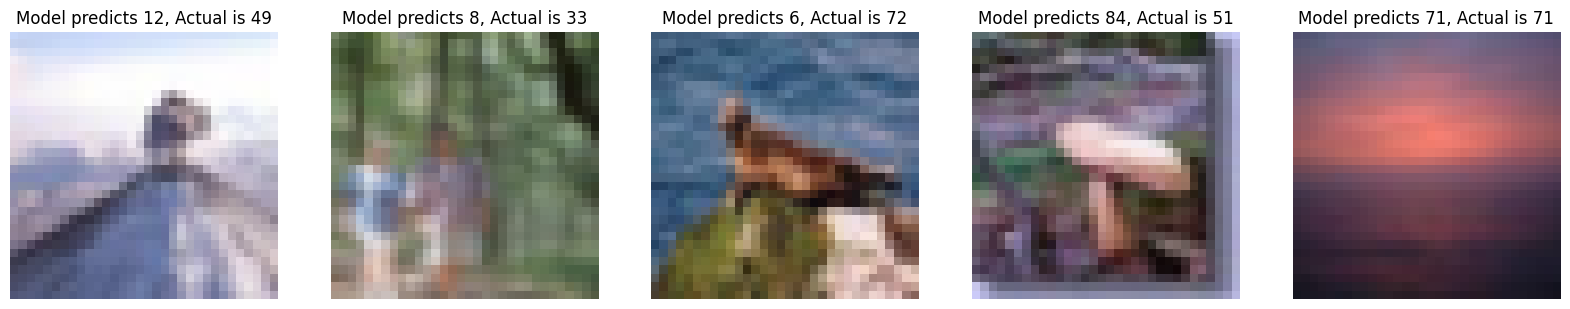

In [ ]:
# Make predictions and convert from probabilities of each digit to single digit
predictions = [np.argmax(d) for d in model_nn.predict(X_test)]


# Plot images with predicted labels
plt.figure(figsize=(20,5))

for i in range(5):
  plt.subplot(1, 5, i+1)
  plt.title(f"Model predicts {predictions[i]}, Actual is {np.argmax(y_test[i])}")
  plt.imshow(X_test[i], cmap='gray')
  plt.axis("off")

plt.show()

### **Reflection Questions**

To complete this section, answer the following reflection questions:

1. What model architecture and set of hyperparameters that you tried produced the best model? The worst model?

2. How generalizable do you believe your best model is? In other words, how well do you believe your model will handle unseen data?

3. How does your best model compare to one that makes completely random guesses? In other words, what would the accuracy of a model be that randomly guesses 1 out of the 100 classes each time?

#### **Solution**

**NOTE**: The answers to 1 - 2 will vary a bit for everyone.

1. With so many features (32 * 32 * 3) and classes (100) we need a more complex model architecture and more epochs to get the best results. The example we have provided achieves about 80% on the training set and 23% on the validation set.

2. The example provided is *very unlikely* to generalize well (we can see this in the test predictions in Problem #3.5). The biggest indication of this is just how big the gap between the validation and training losses and accuracies both are--the so-called "generalization gaps". To get a properly generalizable model, we should stop when the training and validation set curves meet each other.

3. Even just considering the validation accuracy, which is a better representative of how our model will do on unseen data, we are about 20 times better than a random model. Since there are 100 classes, there's a 1/100 or 0.1 chance that a random model would get the right answer. On the other hand, our validation accuracy is 23/100 or 0.23. Often, it's valuable to put evaluation metrics in perspective by comparing to a random model as a baseline.

#End of notebook
---
© 2023 The Coding School, All rights reserved